In [37]:
import pandas as pd

In [38]:
n=['sepal_length','sepal_width','petal_length','petal_width','class']

In [39]:
df=pd.read_csv('iris.csv',names=n)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
df.shape

(150, 5)

In [42]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [43]:
df['class'].nunique()

3

In [44]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

# visualize-pie chart

In [46]:
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [47]:
row_count = [sum(df['class']=='Iris-setosa'),
            sum(df['class']=='Iris-versicolor'),
            sum(df['class']=='Iris-virginica')]
print(row_count)

[50, 50, 50]


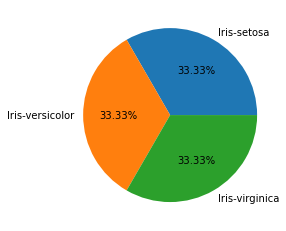

In [48]:
import matplotlib.pyplot as plt
plt.pie(row_count , labels = class_names ,autopct = "%1.2f%%")
plt.show()

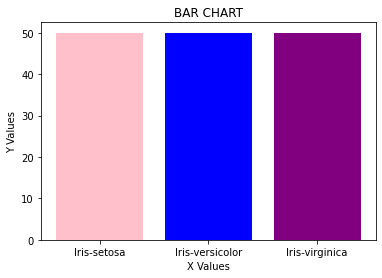

In [49]:
#c=['pink','blue','purple']
plt.bar(class_names,row_count,color=['pink','blue','purple'])
plt.title("BAR CHART")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

# Splitting the data

In [50]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [51]:
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df['class']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [52]:
print(X.head(3))#x is independent

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2


In [53]:
print(y.head(3))

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: class, dtype: object


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
print(X_train.head())
print(y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
91            6.1          3.0           4.6          1.4
135           7.7          3.0           6.1          2.3
69            5.6          2.5           3.9          1.1
128           6.4          2.8           5.6          2.1
114           5.8          2.8           5.1          2.4
91     Iris-versicolor
135     Iris-virginica
69     Iris-versicolor
128     Iris-virginica
114     Iris-virginica
Name: class, dtype: object


In [56]:
X_train.shape

(120, 4)

In [57]:
y_train.shape

(120,)

In [58]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


In [59]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
print("LR:", accuracy_score(y_test,y_pred)*100)

LR: 96.66666666666667


In [61]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


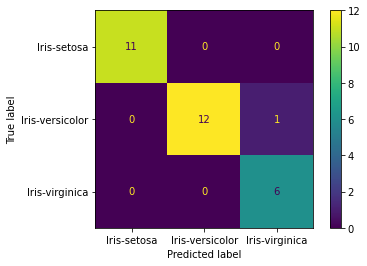

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
cmd.plot()

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

y_pred= knn.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

1.0


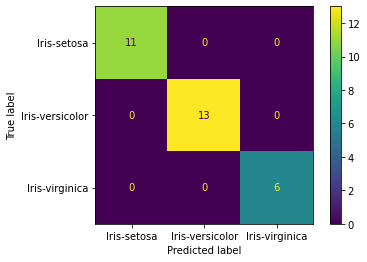

In [64]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm,display_labels=knn.classes_)
cmd.plot()

# NAIVE BAYES

In [65]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)


0.9666666666666667


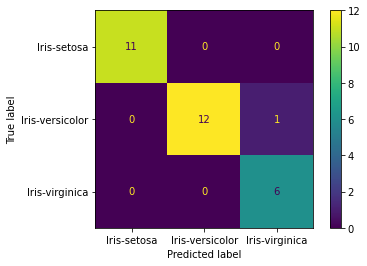

In [66]:
cm = confusion_matrix(y_test,y_pred)
cmd= ConfusionMatrixDisplay(cm,display_labels=nb.classes_)
cmd.plot()

In [67]:
from sklearn.svm import SVC

sv = SVC(gamma='auto')
sv.fit(X_train,y_train)

y_pred=sv.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.9666666666666667


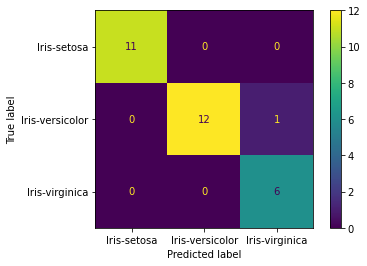

In [68]:
#cmd = confusion_matrix(y_test,y_pred)

#cm=ConfusionMatrixDisplay(cm,display_labels=sv.classes_)
#cmd.plot()
cm = confusion_matrix(y_test,y_pred)
cmd= ConfusionMatrixDisplay(cm,display_labels=sv.classes_)
cmd.plot()

In [69]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.9666666666666667


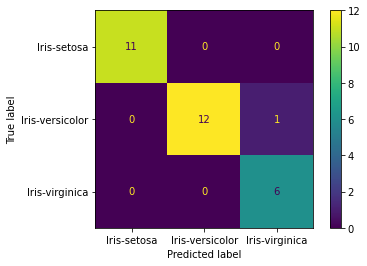

In [70]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm,display_labels=dtree.classes_)

cmd.plot()

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)


    

0.9666666666666667


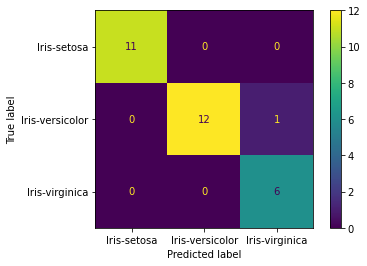

In [72]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)

cmd.plot()


In [73]:
import pickle

pickle.dump(lr,open('irisModel.pkl','wb'))

In [76]:
data=[5.1,3.5,1.4,0.2]

In [81]:
import warnings
warnings.filterwarnings('ignore')
model=pickle.load(open('irisModel.pkl','rb'))
import numpy as np
arr=np.array(data).reshape(1,-1)

result=model.predict(arr)
print(result[0])

Iris-setosa
